In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/musicfeatures2/data (1).csv
/kaggle/input/musicfeatures2/data_2genre.csv
/kaggle/input/musicfeatures/data.csv
/kaggle/input/musicfeatures/data_2genre.csv


In [2]:
## Loading the Dataset
data = pd.read_csv('/kaggle/input/musicfeatures2/data (1).csv')

print(data.shape)
print(data.head())
print(data.info())

data_1 = pd.read_csv('/kaggle/input/musicfeatures2/data (1).csv')
data_2 = pd.read_csv('/kaggle/input/musicfeatures2/data_2genre.csv')

data = pd.concat([data_1, data_2])

(1000, 30)
         filename       tempo  beats  chroma_stft      rmse  \
0  blues.00081.au  103.359375     50     0.380260  0.248262   
1  blues.00022.au   95.703125     44     0.306451  0.113475   
2  blues.00031.au  151.999081     75     0.253487  0.151571   
3  blues.00012.au  184.570312     91     0.269320  0.119072   
4  blues.00056.au  161.499023     74     0.391059  0.137728   

   spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0        2116.942959         1956.611056  4196.107960            0.127272   
1        1156.070496         1497.668176  2170.053545            0.058613   
2        1331.073970         1973.643437  2900.174130            0.042967   
3        1361.045467         1567.804596  2739.625101            0.069124   
4        1811.076084         2052.332563  3927.809582            0.075480   

        mfcc1  ...     mfcc12     mfcc13    mfcc14    mfcc15    mfcc16  \
0  -26.929785  ...  14.336612 -13.821769  7.562789 -6.181372  0.330165   

In [3]:
data['label'].value_counts()
data['label'] = data['label'].replace(to_replace={1: 'pop', 2: 'classical'})
data['label'].value_counts()


label
classical    200
pop          200
blues        100
country      100
disco        100
hiphop       100
jazz         100
metal        100
reggae       100
rock         100
Name: count, dtype: int64

In [4]:
data.isna().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [5]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

features = ["tempo", "beats", "spectral_centroid", "spectral_bandwidth", "rolloff", "zero_crossing_rate"]
features2 = ["tempo", "beats", "rolloff", "spectral_bandwidth"]  # Alternate feature set

X = data[features]
X2 = data[features2]
y = data['label']  

# Split into training and validation datasets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
train_X2, val_X2, train_y2, val_y2 = train_test_split(X2, y, random_state=1)

In [6]:
# Define the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=1)

# Train on the first set of features
rf_model.fit(train_X, train_y)

# Predict and evaluate
rf_val_predictions = rf_model.predict(val_X)
accuracy = accuracy_score(val_y, rf_val_predictions)
print("Validation Accuracy for Random Forest Model (Feature Set 1):", accuracy)
print("\nClassification Report (Feature Set 1):\n", classification_report(val_y, rf_val_predictions))

# Define another RandomForestClassifier for the second feature set
rf_model_selected_features = RandomForestClassifier(random_state=1)

# Train on the second set of features
rf_model_selected_features.fit(train_X2, train_y2)

# Predict and evaluate
rf_model_selected_features_val_predictions = rf_model_selected_features.predict(val_X2)
accuracy2 = accuracy_score(val_y2, rf_model_selected_features_val_predictions)
print("Validation Accuracy for Random Forest Model (Feature Set 2):", accuracy2)
print("\nClassification Report (Feature Set 2):\n", classification_report(val_y2, rf_model_selected_features_val_predictions))

Validation Accuracy for Random Forest Model (Feature Set 1): 0.4766666666666667

Classification Report (Feature Set 1):
               precision    recall  f1-score   support

       blues       0.25      0.20      0.22        25
   classical       0.67      0.91      0.77        44
     country       0.28      0.26      0.27        27
       disco       0.35      0.35      0.35        26
      hiphop       0.32      0.30      0.31        20
        jazz       0.42      0.30      0.35        27
       metal       0.45      0.56      0.50        25
         pop       0.72      0.87      0.79        47
      reggae       0.53      0.30      0.38        33
        rock       0.12      0.12      0.12        26

    accuracy                           0.48       300
   macro avg       0.41      0.42      0.41       300
weighted avg       0.45      0.48      0.46       300

Validation Accuracy for Random Forest Model (Feature Set 2): 0.44666666666666666

Classification Report (Feature Set 2):

First set of features worked a little better. 
Pop and Classical have higher precision and recall, likely because their features are more distinguishable.
The model is better at finding the Classical and Pop music, while Blues, Rock, and Jazz are harder to distinguish. 
Maybe some overlapping or indistinct features for these genres.

Lets try to find the most optimal set of features

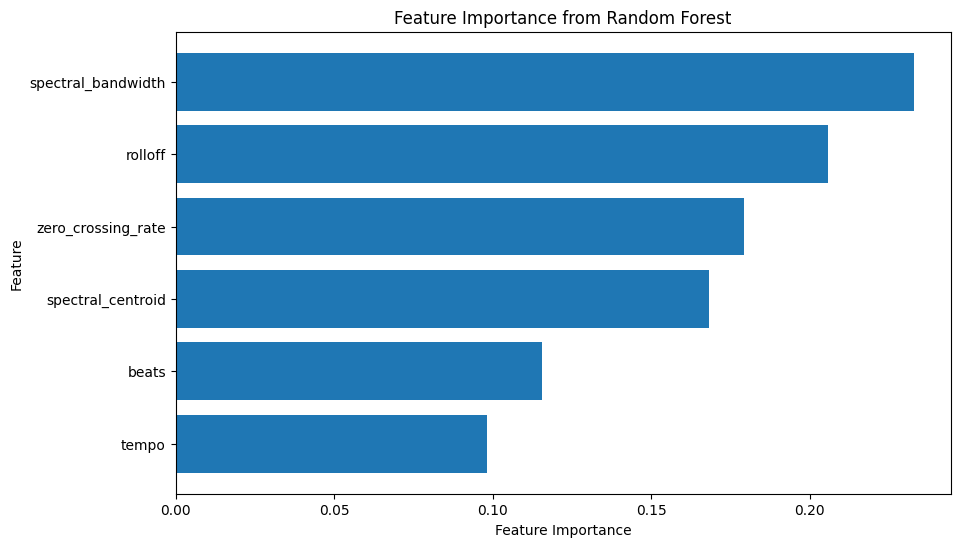

              Feature  Importance
3  spectral_bandwidth    0.232862
4             rolloff    0.205836
5  zero_crossing_rate    0.179365
2   spectral_centroid    0.168205
1               beats    0.115560
0               tempo    0.098172


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# training a random forest on every feature
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(train_X, train_y)

# finding which are most important
importances = rf_model.feature_importances_
feature_names = train_X.columns

# put them in a data frame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

print(feature_importance_df)

The Random Forest says that these 6 features are most important. Now lets try to use these features in a different model like XGBoost

In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

top_features = ["spectral_bandwidth", "rolloff", "zero_crossing_rate", "spectral_centroid", "beats", "tempo"]
train_X_top = train_X[top_features]
val_X_top = val_X[top_features]

# Map string labels to integers
label_mapping = {
    'blues': 0, 'classical': 1, 'country': 2, 'disco': 3,
    'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7,
    'reggae': 8, 'rock': 9
}
train_y_mapped = train_y.map(label_mapping)
val_y_mapped = val_y.map(label_mapping)

# Train XGBoost model
xgb_model = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(train_X_top, train_y_mapped)

# Predict and evaluate
xgb_predictions = xgb_model.predict(val_X_top)
xgb_accuracy = accuracy_score(val_y_mapped, xgb_predictions)

print("Validation Accuracy for XGBoost Model:", xgb_accuracy)
print("\nClassification Report for XGBoost Model:\n", classification_report(val_y_mapped, xgb_predictions))



Validation Accuracy for XGBoost Model: 0.4766666666666667

Classification Report for XGBoost Model:
               precision    recall  f1-score   support

           0       0.39      0.36      0.37        25
           1       0.74      0.91      0.82        44
           2       0.22      0.15      0.18        27
           3       0.31      0.35      0.33        26
           4       0.32      0.35      0.33        20
           5       0.19      0.19      0.19        27
           6       0.45      0.56      0.50        25
           7       0.78      0.91      0.84        47
           8       0.50      0.27      0.35        33
           9       0.12      0.12      0.12        26

    accuracy                           0.48       300
   macro avg       0.40      0.42      0.40       300
weighted avg       0.45      0.48      0.46       300



The XGBoost and the Random Forest are performing similarly. So maybe the selected features are actually limiting the model's ability to distinguish genres. It looks like the Classical and Pop consistently have better recall and precision, so there must be some feature that allows the model to distinguish it easier than the other genres. But first lets tune the parameters to see if we can make the XGBoost model better. 

In [9]:
#Define XGBoost model with parameter tuning
xgb_model = XGBClassifier(
    n_estimators=500,        # Number of trees
    learning_rate=0.05,      # Step size shrinkage
    n_jobs=-1,               # Use all available CPU cores
    random_state=1,          # Reproducibility
    use_label_encoder=False, # Required to avoid warnings
    eval_metric='mlogloss'   # Evaluation metric
)


xgb_model.fit(
    train_X_top, train_y_mapped,
    eval_set=[(val_X_top, val_y_mapped)],
)

# Predictions and evaluation
xgb_predictions = xgb_model.predict(val_X_top)
xgb_accuracy = accuracy_score(val_y_mapped, xgb_predictions)

print("Validation Accuracy for Optimized XGBoost Model:", xgb_accuracy)
print("\nClassification Report for Optimized XGBoost Model:\n", classification_report(val_y_mapped, xgb_predictions))


[0]	validation_0-mlogloss:2.24545
[1]	validation_0-mlogloss:2.19345
[2]	validation_0-mlogloss:2.15023
[3]	validation_0-mlogloss:2.11132
[4]	validation_0-mlogloss:2.07287
[5]	validation_0-mlogloss:2.03837
[6]	validation_0-mlogloss:2.00747
[7]	validation_0-mlogloss:1.98076
[8]	validation_0-mlogloss:1.95287
[9]	validation_0-mlogloss:1.93031
[10]	validation_0-mlogloss:1.90750
[11]	validation_0-mlogloss:1.88412
[12]	validation_0-mlogloss:1.86461
[13]	validation_0-mlogloss:1.84646
[14]	validation_0-mlogloss:1.82963
[15]	validation_0-mlogloss:1.81288
[16]	validation_0-mlogloss:1.79853
[17]	validation_0-mlogloss:1.78378
[18]	validation_0-mlogloss:1.77025
[19]	validation_0-mlogloss:1.75862
[20]	validation_0-mlogloss:1.74709
[21]	validation_0-mlogloss:1.73490
[22]	validation_0-mlogloss:1.72262
[23]	validation_0-mlogloss:1.71253
[24]	validation_0-mlogloss:1.70333
[25]	validation_0-mlogloss:1.69608
[26]	validation_0-mlogloss:1.68927
[27]	validation_0-mlogloss:1.68224
[28]	validation_0-mlogloss:1.6

XGBoost doesn't seem to be very effective. We have already tried the random forest, so now lets just try a decision tree. 

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=1, max_depth=5)  # Adjust max_depth for complexity

# Train the model on the top features
dt_model.fit(train_X_top, train_y_mapped)

# Make predictions
dt_predictions = dt_model.predict(val_X_top)

# Evaluate the model
dt_accuracy = accuracy_score(val_y_mapped, dt_predictions)
print("Validation Accuracy for Decision Tree Model:", dt_accuracy)
print("\nClassification Report for Decision Tree Model:\n", classification_report(val_y_mapped, dt_predictions))


Validation Accuracy for Decision Tree Model: 0.3933333333333333

Classification Report for Decision Tree Model:
               precision    recall  f1-score   support

           0       0.22      0.16      0.19        25
           1       0.62      0.86      0.72        44
           2       0.10      0.04      0.05        27
           3       0.45      0.19      0.27        26
           4       0.21      0.15      0.18        20
           5       0.00      0.00      0.00        27
           6       0.50      0.36      0.42        25
           7       0.52      0.79      0.63        47
           8       0.26      0.30      0.28        33
           9       0.19      0.42      0.26        26

    accuracy                           0.39       300
   macro avg       0.31      0.33      0.30       300
weighted avg       0.34      0.39      0.35       300



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Since none of these models performed well, I suspect that the features I chose were not optimal. Im going to try to represent more features, and perhaps make a deeper tree. 

This is what I have for Dec 8 submission, will continue working